### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there 'right away' or 'later before the coupon expires' are labeled as 'Y = 1' and answers 'no, I do not want the coupon' are labeled as 'Y = 0'.  There are five different types of coupons -- less expensive restaurants (under $20), coffee houses, carry out & take away, bar, and more expensive restaurants ($20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.

### Data Description

Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [4]:
missing_values = data.isnull().sum()
summary_stats = data.describe(include='all')
missing_values, summary_stats

(destination                 0
 passanger                   0
 weather                     0
 temperature                 0
 time                        0
 coupon                      0
 expiration                  0
 gender                      0
 age                         0
 maritalStatus               0
 has_children                0
 education                   0
 occupation                  0
 income                      0
 car                     12576
 Bar                       107
 CoffeeHouse               217
 CarryAway                 151
 RestaurantLessThan20      130
 Restaurant20To50          189
 toCoupon_GEQ5min            0
 toCoupon_GEQ15min           0
 toCoupon_GEQ25min           0
 direction_same              0
 direction_opp               0
 Y                           0
 dtype: int64,
             destination passanger weather   temperature   time        coupon  \
 count             12684     12684   12684  12684.000000  12684         12684   
 unique          

3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
# Dropping the 'car' column as there are 12,576 missing values out of a total of 12,685, and this doesn't seem to be an important feature for prediction
data.drop('car', axis=1, inplace=True)

# For the other columns with missing data (Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50), I will replace the missing values with the mode of the column
columns_to_impute = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in columns_to_impute:
    mode_value = data[column].mode()[0] # Get the mode value for the current column
    data[column].fillna(mode_value, inplace=True) # Fill missing values with the mode

# Verify that all missing values have been addressed
missing_values_updated = data.isnull().sum()

4. What proportion of the total observations chose to accept the coupon?

In [6]:
# Calculate the number and proportion of observations where the coupon was accepted
accepted_coupon = len(data[data['Y'] == 1]) # Count rows where the coupon was accepted
total_coupon = len(data) # Total number of rows or observations
percentage_accepted_coupon = (accepted_coupon / total_coupon) * 100 # Calculate acceptance rate

# Print results
print(f"Total Coupons Accepted: {accepted_coupon}")
print(f"Total Coupons: {total_coupon}")
print(f'Percentage of Coupons Accepted: {percentage_accepted_coupon:.2f}%')

Total Coupons Accepted: 7210
Total Coupons: 12684
Percentage of Coupons Accepted: 56.84%


5. Use a bar plot to visualize the `coupon` column.

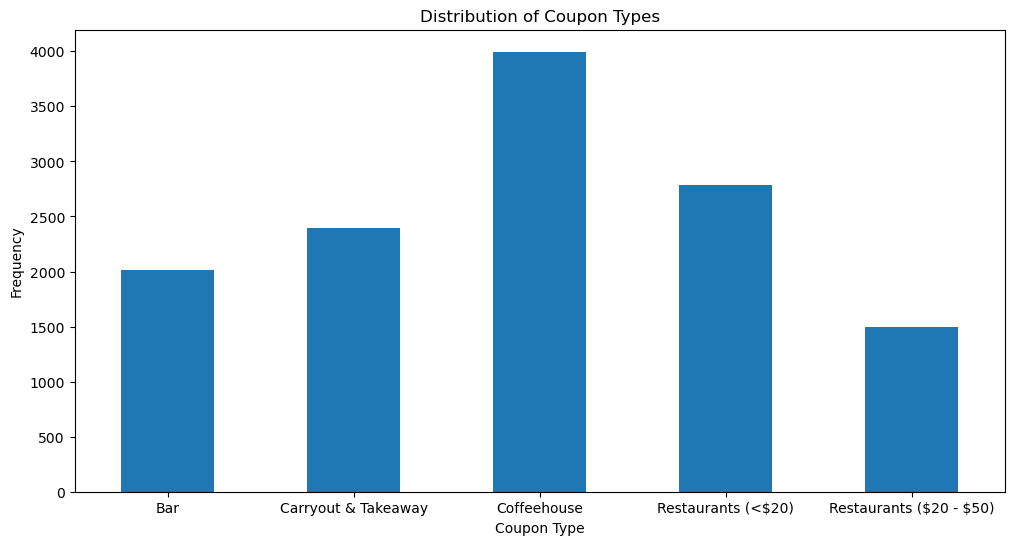

In [7]:
# Predefined order and labels for better presentation in bar plot
coupon_type_order = ['Bar', 'Carry out & Take away', 'Coffee House', 'Restaurant(<20)', 'Restaurant(20-50)']
coupon_type_x_axis_labels = ['Bar', 'Carryout & Takeaway', 'Coffeehouse', 'Restaurants (<$20)', 'Restaurants (\$20 - \$50)']

# Plot
plt.figure(figsize=(12, 6))
data['coupon'].value_counts().loc[coupon_type_order].plot(kind='bar')
plt.xlabel('Coupon Type')
plt.ylabel('Frequency')
plt.title('Distribution of Coupon Types')
plt.xticks(ticks=range(len(coupon_type_order)), labels=coupon_type_x_axis_labels, rotation=0)
plt.savefig('images/01-coupon-bar.png', bbox_inches='tight', dpi=300)
plt.show()

6. Use a histogram to visualize the temperature column.

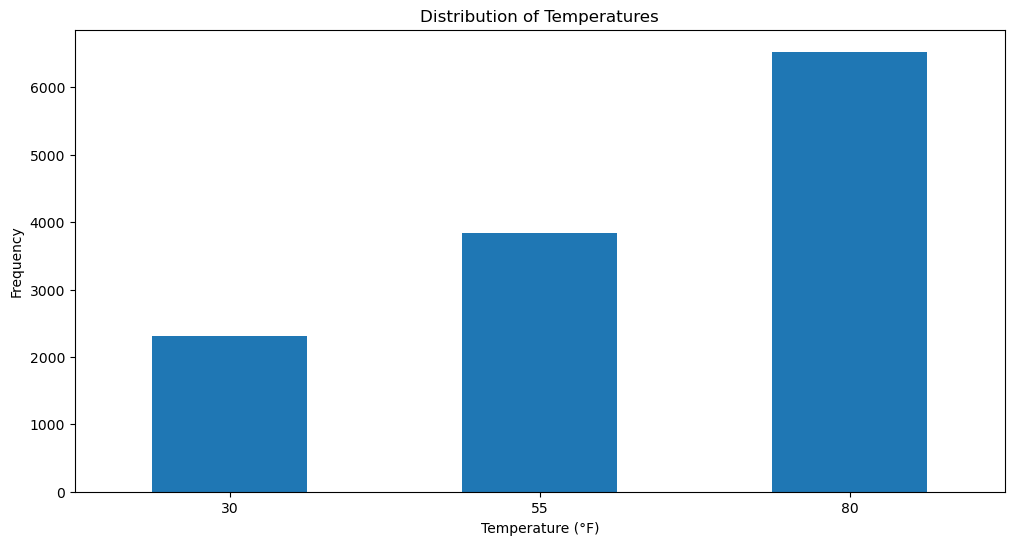

In [8]:
# Predefined order for better presentation in histogram
temperature_order = [30, 55, 80]

# Plot
plt.figure(figsize=(12, 6))
data['temperature'].value_counts().loc[temperature_order].plot(kind='bar')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperatures')
plt.xticks(ticks=range(len(temperature_order)), labels=temperature_order, rotation=0)
plt.savefig('images/02-temperature-histogram.png', bbox_inches='tight', dpi=300)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.

1. Create a new `DataFrame` that contains just the bar coupons.

In [9]:
# Filter the dataset for only 'Bar' coupon type
bar_df = data[data['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?

In [10]:
# Calculate the number and proportion of observations where the bar coupon was accepted
accepted_bar = len(bar_df[bar_df['Y'] == 1]) # Count rows where the coupon was accepted
total_bar = len(bar_df) # Total number of rows or observations
percentage_accepted_bar = (accepted_bar / total_bar) * 100 # Calculate acceptance rate

# Print results
print(f"Total Bar Coupons Accepted: {accepted_bar}")
print(f"Total Bar Coupons: {total_bar}")
print(f"Percentage of Bar Coupons Accepted: {percentage_accepted_bar:.2f}%")

Total Bar Coupons Accepted: 827
Total Bar Coupons: 2017
Percentage of Bar Coupons Accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [11]:
# Group 1 Bar: Those who go to a bar <=3x per month
group_1_bar = bar_df[bar_df['Bar'].isin(['never', 'less1', '1~3'])]

# Group 2 Bar: Those who go to a bar >3x per month
group_2_bar = bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for each group
accepted_group_1_bar = len(group_1_bar[group_1_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_1_bar = len(group_1_bar) # Total number of rows or observations
percentage_accepted_group_1_bar = (accepted_group_1_bar / total_group_1_bar if total_group_1_bar > 0 else 0) * 100 # Calculate acceptance rate

accepted_group_2_bar = len(group_2_bar[group_2_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_2_bar = len(group_2_bar) # Total number of rows or observations
percentage_accepted_group_2_bar = (accepted_group_2_bar / total_group_2_bar if total_group_2_bar > 0 else 0) * 100 # Calculate acceptance rate

# Print results
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar <=3x per Month: {accepted_group_1_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar <=3x per Month: {total_group_1_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar <=3x per Month: {percentage_accepted_group_1_bar:.2f}%")
print("")
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar >3x per Month: {accepted_group_2_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar >3x per Month: {total_group_2_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar >3x per Month: {percentage_accepted_group_2_bar:.2f}%")

Total Bar Coupons Accepted by Those Who Go to the Bar <=3x per Month: 674
Total Bar Coupons for Those Who Go to the Bar <=3x per Month: 1818
Percentage of Bar Coupons Accepted by Those Who Go to the Bar <=3x per Month: 37.07%

Total Bar Coupons Accepted by Those Who Go to the Bar >3x per Month: 153
Total Bar Coupons for Those Who Go to the Bar >3x per Month: 199
Percentage of Bar Coupons Accepted by Those Who Go to the Bar >3x per Month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others. Is there a difference?

In [12]:
# Group 3 Bar: Those who go to a bar >=1x per month and are >25 years old
age_over_25 = ['26', '31', '36', '41', '46', '50plus']
group_3_bar = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_df['age'].isin(age_over_25))]

# Group 4 Bar: All others
group_4_bar = bar_df[~bar_df.index.isin(group_3_bar.index)]

# Calculate acceptance rates for each group
accepted_group_3_bar = len(group_3_bar[group_3_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_3_bar = len(group_3_bar) # Total number of rows or observations
percentage_accepted_group_3_bar = (accepted_group_3_bar / total_group_3_bar if total_group_3_bar > 0 else 0) * 100 # Calculate acceptance rate

accepted_group_4_bar = len(group_4_bar[group_4_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_4_bar = len(group_4_bar) # Total number of rows or observations
percentage_accepted_group_4_bar = (accepted_group_4_bar / total_group_4_bar if total_group_4_bar > 0 else 0) * 100 # Calculate acceptance rate

# Print results
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are >25 Year Old: {accepted_group_3_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar >=1x per Month and are >25 Year Old: {total_group_3_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are >25 Year Old: {percentage_accepted_group_3_bar:.2f}%")
print("")
print(f"Total Bar Coupons Accepted by All Others: {accepted_group_4_bar}")
print(f"Total Bar Coupons for All Others: {total_group_4_bar}")
print(f"Percentage of Bar Coupons Accepted by All Others {percentage_accepted_group_4_bar:.2f}%")

Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are >25 Year Old: 292
Total Bar Coupons for Those Who Go to the Bar >=1x per Month and are >25 Year Old: 420
Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are >25 Year Old: 69.52%

Total Bar Coupons Accepted by All Others: 535
Total Bar Coupons for All Others: 1597
Percentage of Bar Coupons Accepted by All Others 33.50%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.

In [13]:
# Group 5 Bar: Those who go to a bar >=1x per month, had non-kid passengers, and had occupations other than farming, fishing, or forestry
group_5_bar = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (bar_df['passanger'] != 'Kid(s)') &
                (bar_df['occupation'] != 'Farming Fishing & Forestry')]

# Group 6 Bar: All others
group_6_bar = bar_df[~bar_df.index.isin(group_5_bar.index)]

# Calculate acceptance rates for each group
accepted_group_5_bar = len(group_5_bar[group_5_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_5_bar = len(group_5_bar) # Total number of rows or observations
percentage_accepted_group_5_bar = (accepted_group_5_bar / total_group_5_bar if total_group_5_bar > 0 else 0) * 100 # Calculate acceptance rate

accepted_group_6_bar = len(group_6_bar[group_6_bar['Y'] == 1]) # Count rows where the coupon was accepted
total_group_6_bar = len(group_6_bar) # Total number of rows or observations
percentage_accepted_group_6_bar = (accepted_group_6_bar / total_group_6_bar if total_group_6_bar > 0 else 0) * 100 # Calculate acceptance rate

# Print results
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: {accepted_group_5_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: {total_group_5_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: {percentage_accepted_group_5_bar:.2f}%")
print("")
print(f"Total Bar Coupons Accepted by All Others: {accepted_group_6_bar}")
print(f"Total Bar Coupons for All Others: {total_group_6_bar}")
print(f"Percentage of Bar Coupons Accepted by All Others {percentage_accepted_group_6_bar:.2f}%")

Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: 393
Total Bar Coupons for Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: 551
Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Had Occupations Other Than Farming, Fishing, or Forestry: 71.32%

Total Bar Coupons Accepted by All Others: 434
Total Bar Coupons for All Others: 1466
Percentage of Bar Coupons Accepted by All Others 29.60%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.

In [14]:
# Group 7 Bar: Those who go to bars >=1x per month, had non-kid passengers, and were not widowed
group_7_bar = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (bar_df['passanger'] != 'Kid(s)') &
                (bar_df['maritalStatus'] != 'Widowed')]

# Group 8 Bar: Those who go to bars >=1x per month and are <30 years old
age_under_30 = ['below21', '21', '26']
group_8_bar = bar_df[(bar_df['Bar'].isin(['1~3', '4~8', 'gt8'])) &
                (bar_df['age'].isin(age_under_30))]

# Group 9 Bar: Those who go to cheap restaurants >=4x per month and whose income is <$50K
income_under_50K = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']
group_9_bar = data[(data['RestaurantLessThan20'].isin(['4~8', 'gt8'])) &
                (data['income'].isin(income_under_50K))]

# Function to calculate the acceptance rate for groups 7-9
def calculate_percentage_accepted_groups_7_to_9_bar(group):
    accepted_group = len(group[group['Y'] == 1])
    total_group = len(group)
    percentage_accepted_group = (accepted_group / total_group if total_group > 0 else 0) * 100
    return accepted_group, total_group, percentage_accepted_group

# Calculate acceptance rates for each group
accepted_group_7_bar, total_group_7_bar, percentage_accepted_group_7_bar = calculate_percentage_accepted_groups_7_to_9_bar(group_7_bar)
accepted_group_8_bar, total_group_8_bar, percentage_accepted_group_8_bar = calculate_percentage_accepted_groups_7_to_9_bar(group_8_bar)
accepted_group_9_bar, total_group_9_bar, percentage_accepted_group_9_bar = calculate_percentage_accepted_groups_7_to_9_bar(group_9_bar)

# Print results
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: {accepted_group_7_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: {total_group_7_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: {percentage_accepted_group_7_bar:.2f}%")
print("")
print(f"Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are <30 Years Old: {accepted_group_8_bar}")
print(f"Total Bar Coupons for Those Who Go to the Bar >=1x per Month and are <30 Years Old: {total_group_8_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are <30 Years Old: {percentage_accepted_group_8_bar:.2f}%")
print("")
print(f"Total Bar Coupons Accepted by Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: {accepted_group_9_bar}")
print(f"Total Bar Coupons for Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: {total_group_9_bar}")
print(f"Percentage of Bar Coupons Accepted by Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: {percentage_accepted_group_9_bar:.2f}%")

Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: 393
Total Bar Coupons for Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: 551
Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month, Had Non-Kid Passangers, and Were Not Widowed: 71.32%

Total Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are <30 Years Old: 249
Total Bar Coupons for Those Who Go to the Bar >=1x per Month and are <30 Years Old: 345
Percentage of Bar Coupons Accepted by Those Who Go to the Bar >=1x per Month and are <30 Years Old: 72.17%

Total Bar Coupons Accepted by Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: 1369
Total Bar Coupons for Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: 2279
Percentage of Bar Coupons Accepted by Those Who Go to Cheap Restaurants >=4x per Month and Whose Income is <$50K: 60.07%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

I would hypothesize the following about drivers who accepted the bar coupons:

1. Younger individuals (under the age of 30) who frequent bars more than once a month have the highest acceptance rate for bar coupons. This could be due to the fact that younger individuals are more likely to go to bars and are more likely to be open to trying new bars.

2. Those who go to the bar more than once a month, did not have kid passangers, and are not involved in farming, fishing, or forestry occupations had the second highest acceptance rate, and this was tied with >once a month bar goers who did not have a kid passanger and who were not widowed. This suggest that there may be a social element to accepting bar coupons and going to bars.

3. Drivers who visit bars more than once a month are significantly more likely to accept bar coupons, perhaps because they see more value in the coupon.

5. Drivers who frequent cheaper restaurants and have a lower income also have a considerable rate of accepting coupons, although this group had the lowest acceptance rate. This suggests that individuals who are budget-conscious or have limited disposable income find value in such coupons.

6. The high acceptance rates across the specified groups (ranging from 60% to 72%) suggest that targeted marketing strategies could be very effective. These specific demographics can be focused on to achieve a high return on marketing investment.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.

## Exploring the Coffeehouse Coupon Group

### Calculate Percentage of Coffeehouse Coupons Accepted

In [15]:
# Create a DataFrame filtered for only 'Coffee House' coupons
coffeehouse_df = data[data['coupon'] == 'Coffee House']

# Calculate the number and proportion of observations where the coupon was accepted
accepted_coffeehouse = len(coffeehouse_df[coffeehouse_df['Y'] == 1]) # Count rows where the coupon was accepted
total_coffeehouse = len(coffeehouse_df) # Total number of rows or observations
percentage_accepted_coffeehouse = (accepted_coffeehouse / total_coffeehouse) * 100 # Calculate acceptance rate

# Print results
print(f"Total Coffeehouse Coupons Accepted: {accepted_coffeehouse}")
print(f"Total Coffeehouse Coupons: {total_coffeehouse}")
print(f"Percentage of Coffeehouse Coupons Accepted: {percentage_accepted_coffeehouse:.2f}%")

Total Coffeehouse Coupons Accepted: 1995
Total Coffeehouse Coupons: 3996
Percentage of Coffeehouse Coupons Accepted: 49.92%


### Compare Percentages of Coffeehouse Coupons Accepted by Destination

In [16]:
# Calculate the number and proportion of observations where the coupon was accepted by destination
accepted_coffeehouse_by_destination = coffeehouse_df.groupby('destination')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by destination
total_coffeehouse_by_destination = coffeehouse_df.groupby('destination')['Y'].count() # Group and compute the total number of Coffeehouse coupons by destination
percentage_accepted_coffeehouse_by_destination = (accepted_coffeehouse_by_destination / total_coffeehouse_by_destination) * 100 # Calculate the percentage of accepted Coffeehouse coupons by destination

# Predefined custom order and labels for destinations for better presentation in table and bar plot
destination_order = ['Home', 'No Urgent Place', 'Work']
destination_order_labels = ['Home', 'No Urgent Place', 'Work']

# Reorder the series based on the custom order
accepted_coffeehouse_by_destination = accepted_coffeehouse_by_destination.reindex(destination_order)
total_coffeehouse_by_destination = total_coffeehouse_by_destination.reindex(destination_order)
percentage_accepted_coffeehouse_by_destination = percentage_accepted_coffeehouse_by_destination.reindex(destination_order)

# Predefined format for printing results in a table-like manner
coffeehouse_destination_data_table_format = "{:<15} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Destination")
print("")
print(coffeehouse_destination_data_table_format.format("Destination", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 71)

# Print the values for each destination based on the custom order and format
for i, destination in enumerate(destination_order):
    print(coffeehouse_destination_data_table_format.format(
        destination_order_labels[i],
        accepted_coffeehouse_by_destination[destination],
        total_coffeehouse_by_destination[destination],
        round(percentage_accepted_coffeehouse_by_destination[destination], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Destination

Destination     | Total Accepted | Total Coupons | Percentage Accepted 
-----------------------------------------------------------------------
Home            | 336            | 928           | 36.21               
No Urgent Place | 1252           | 2155          | 58.1                
Work            | 407            | 913           | 44.58               


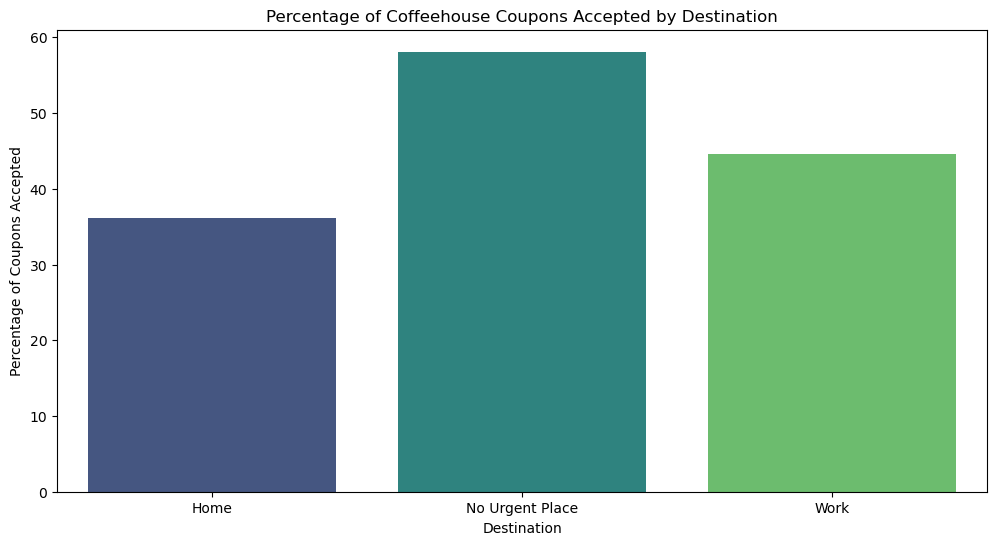

In [17]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=destination_order, y=percentage_accepted_coffeehouse_by_destination.values, palette="viridis", order=destination_order)
plt.xlabel('Destination')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Destination')
plt.xticks(ticks=range(len(destination_order)), labels=destination_order_labels)

# Save the plot as an image file
plt.savefig('images/03-percentage-of-coffeehouse-coupons-accepted-by-destination.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those With No Urgent Destination and All Others

In [18]:
# Calculate the number and proportion of observations where the coupon was accepted by those with no urgent destination
accepted_coffeehouse_no_urgent_place = accepted_coffeehouse_by_destination.loc['No Urgent Place'] # Group and compute the number of accepted Coffeehouse coupons by those with no urgent destination
total_coffeehouse_no_urgent_place = total_coffeehouse_by_destination.loc['No Urgent Place'] # Group and compute the total number of Coffeehouse coupons by those with no urgent destination
percentage_accepted_coffeehouse_no_urgent_place = (accepted_coffeehouse_no_urgent_place / total_coffeehouse_no_urgent_place) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those with no urgent destination

# Calculate the number and proportion of observations where the coupon was accepted by all others
accepted_coffeehouse_other_destinations = accepted_coffeehouse_by_destination.loc[['Home', 'Work']].sum() # Group and compute the number of accepted Coffeehouse coupons by all others
total_coffeehouse_other_destinations = total_coffeehouse_by_destination.loc[['Home', 'Work']].sum() # Group and compute the total number of Coffeehouse coupons by all others
percentage_accepted_coffeehouse_other_destinations = (accepted_coffeehouse_other_destinations / total_coffeehouse_other_destinations) * 100 # Calculate the percentage of accepted Coffeehouse coupons by all others

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who Have No Urgent Place to Go: {accepted_coffeehouse_no_urgent_place}")
print(f"Total Coffeehouse Coupons for Those Who Have No Urgent Place to Go: {total_coffeehouse_no_urgent_place}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who Have No Urgent Place to Go: {percentage_accepted_coffeehouse_no_urgent_place:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who Have Other Destinations: {accepted_coffeehouse_other_destinations}")
print(f"Total Coffeehouse Coupons for Those Who Have Other Destinations: {total_coffeehouse_other_destinations}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who Have Other Destinations: {percentage_accepted_coffeehouse_other_destinations:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who Have No Urgent Place to Go: 1252
Total Coffeehouse Coupons for Those Who Have No Urgent Place to Go: 2155
Percentage of Coffeehouse Coupons Accepted by Those Who Have No Urgent Place to Go: 58.10%

Total Coffeehouse Coupons Accepted by Those Who Have Other Destinations: 743
Total Coffeehouse Coupons for Those Who Have Other Destinations: 1841
Percentage of Coffeehouse Coupons Accepted by Those Who Have Other Destinations: 40.36%


### Compare Percentages of Coffeehouse Coupons Accepted by Passanger

In [19]:
# Calculate the number and proportion of observations where the coupon was accepted by passanger
accepted_coffeehouse_by_passanger = coffeehouse_df.groupby('passanger')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by passanger
total_coffeehouse_by_passanger = coffeehouse_df.groupby('passanger')['Y'].count() # Group and compute the total number of Coffeehouse coupons by passanger
percentage_accepted_coffeehouse_by_passanger = (accepted_coffeehouse_by_passanger / total_coffeehouse_by_passanger) * 100 # Calculate the percentage of accepted Coffeehouse coupons by passanger

# Predefined custom order and labels for passangers for better presentation in table and bar plot
passanger_order = ['Alone', 'Friend(s)', 'Kid(s)', 'Partner']
passanger_order_labels = ['Alone', 'Friends', 'Kids', 'Partner']

# Reorder the series based on the custom order
accepted_coffeehouse_by_passanger = accepted_coffeehouse_by_passanger.reindex(passanger_order)
total_coffeehouse_by_passanger = total_coffeehouse_by_passanger.reindex(passanger_order)
percentage_accepted_coffeehouse_by_passanger = percentage_accepted_coffeehouse_by_passanger.reindex(passanger_order)

# Predefined format for printing results in a table-like manner
coffeehouse_passanger_data_table_format = "{:<9} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Passanger")
print("")
print(coffeehouse_passanger_data_table_format.format("Passanger", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 65)

# Print the values for each destination based on the custom order and format
for i, passanger in enumerate(passanger_order):
    print(coffeehouse_passanger_data_table_format.format(
        passanger_order_labels[i],
        accepted_coffeehouse_by_passanger[passanger],
        total_coffeehouse_by_passanger[passanger],
        round(percentage_accepted_coffeehouse_by_passanger[passanger], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Passanger

Passanger | Total Accepted | Total Coupons | Percentage Accepted 
-----------------------------------------------------------------
Alone     | 988            | 2256          | 43.79               
Friends   | 733            | 1228          | 59.69               
Kids      | 100            | 207           | 48.31               
Partner   | 174            | 305           | 57.05               


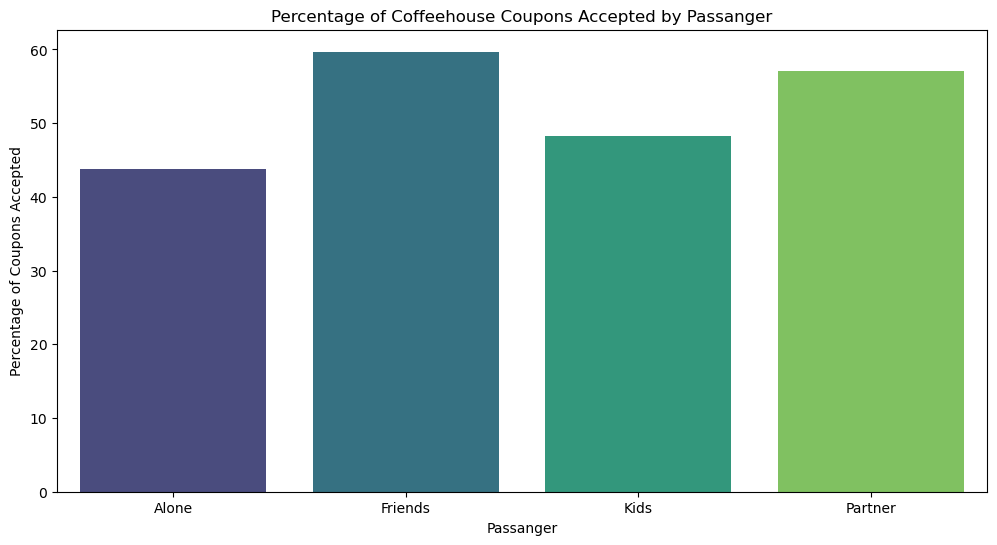

In [20]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=passanger_order, y=percentage_accepted_coffeehouse_by_passanger.values, palette="viridis", order=passanger_order)
plt.xlabel('Passanger')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Passanger')
plt.xticks(ticks=range(len(passanger_order)), labels=passanger_order_labels)

# Save the plot as an image file
plt.savefig('images/04-percentage-of-coffeehouse-coupons-accepted-by-passanger.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Traveling With a Friend or Partner and All Others

In [21]:
# Calculate the number and proportion of observations where the coupon was accepted by those traveling with a friend or partner
accepted_coffeehouse_friend_or_partner = accepted_coffeehouse_by_passanger.loc[['Friend(s)', 'Partner']].sum() # Group and compute the number of accepted Coffeehouse coupons by those traveling with a friend or partner
total_coffeehouse_friend_or_partner = total_coffeehouse_by_passanger.loc[['Friend(s)', 'Partner']].sum() # Group and compute the total number of Coffeehouse coupons by those traveling with a friend or partner
percentage_accepted_coffeehouse_friend_or_partner = (accepted_coffeehouse_friend_or_partner / total_coffeehouse_friend_or_partner) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those traveling with a friend or partner

# Calculate the number and proportion of observations where the coupon was accepted by all others
accepted_coffeehouse_alone_or_kids = accepted_coffeehouse_by_passanger.loc[['Alone', 'Kid(s)']].sum() # Group and compute the number of accepted Coffeehouse coupons by all others
total_coffeehouse_alone_or_kids = total_coffeehouse_by_passanger.loc[['Alone', 'Kid(s)']].sum() # Group and compute the total number of Coffeehouse coupons by all others
percentage_accepted_coffeehouse_alone_or_kids = (accepted_coffeehouse_alone_or_kids / total_coffeehouse_alone_or_kids) * 100 # Calculate the percentage of accepted Coffeehouse coupons by all others

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling With Friend(s) or a Partner: {accepted_coffeehouse_friend_or_partner}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling With Friend(s) or a Partner: {total_coffeehouse_friend_or_partner}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling With Friend(s) or a Partner: {percentage_accepted_coffeehouse_friend_or_partner:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling Alone or With Kid(s): {accepted_coffeehouse_alone_or_kids}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling Alone or With Kid(s): {total_coffeehouse_alone_or_kids}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling Alone or With Kid(s): {percentage_accepted_coffeehouse_alone_or_kids:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who are Traveling With Friend(s) or a Partner: 907
Total Coffeehouse Coupons for Those Who are Traveling With Friend(s) or a Partner: 1533
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling With Friend(s) or a Partner: 59.17%

Total Coffeehouse Coupons Accepted by Those Who are Traveling Alone or With Kid(s): 1088
Total Coffeehouse Coupons for Those Who are Traveling Alone or With Kid(s): 2463
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling Alone or With Kid(s): 44.17%


### Compare Percentages of Coffeehouse Coupons Accepted by Weather

In [22]:
# Group and compute the number of accepted Coffeehouse coupons by weather
accepted_coffeehouse_by_weather = coffeehouse_df.groupby('weather')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by weather
total_coffeehouse_by_weather = coffeehouse_df.groupby('weather')['Y'].count() # Group and compute the total number of Coffeehouse coupons by weather
percentage_accepted_coffeehouse_by_weather = (accepted_coffeehouse_by_weather / total_coffeehouse_by_weather) * 100 # Calculate the percentage of accepted Coffeehouse coupons by weather

# Predefined custom order and labels for weather for better presentation in table and bar plot
weather_order = ['Rainy', 'Snowy', 'Sunny']
weather_order_labels = ['Rainy', 'Snowy', 'Sunny']

# Reorder the series based on the custom order
accepted_coffeehouse_by_weather = accepted_coffeehouse_by_weather.reindex(weather_order)
total_coffeehouse_by_weather = total_coffeehouse_by_weather.reindex(weather_order)
percentage_accepted_coffeehouse_by_weather = percentage_accepted_coffeehouse_by_weather.reindex(weather_order)

# Predefined format for printing results in a table-like manner
coffeehouse_weather_data_table_format = "{:<7} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Weather")
print("")
print(coffeehouse_weather_data_table_format.format("Weather", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 63)

# Print the values for each destination based on the custom order and format
for i, weather in enumerate(weather_order):
    print(coffeehouse_weather_data_table_format.format(
        weather_order_labels[i],
        accepted_coffeehouse_by_weather[weather],
        total_coffeehouse_by_weather[weather],
        round(percentage_accepted_coffeehouse_by_weather[weather], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Weather

Weather | Total Accepted | Total Coupons | Percentage Accepted 
---------------------------------------------------------------
Rainy   | 118            | 226           | 52.21               
Snowy   | 131            | 303           | 43.23               
Sunny   | 1746           | 3467          | 50.36               


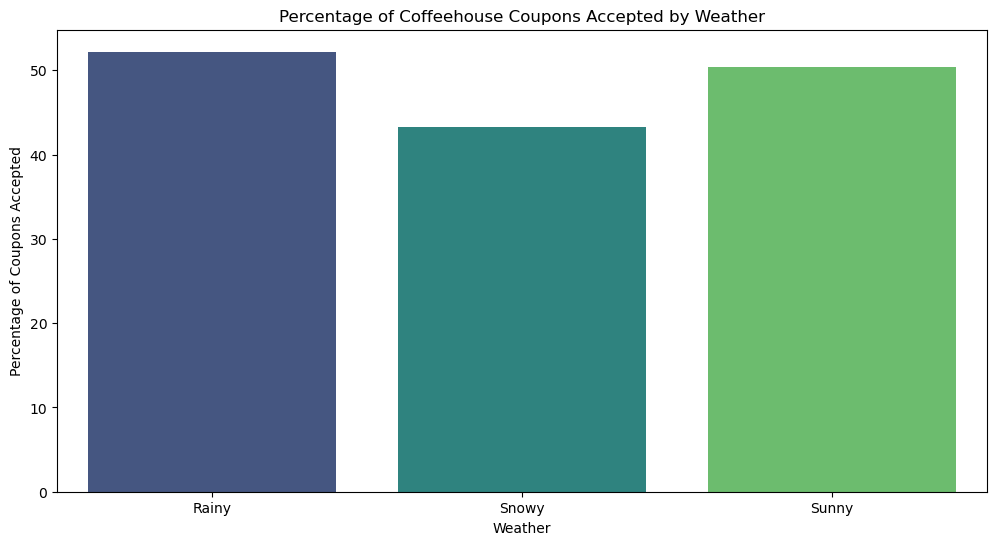

In [23]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=weather_order, y=percentage_accepted_coffeehouse_by_weather.values, palette="viridis", order=weather_order)
plt.xlabel('Weather')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Weather')
plt.xticks(ticks=range(len(weather_order)), labels=weather_order_labels)

# Save the plot as an image file
plt.savefig('images/05-percentage-of-coffeehouse-coupons-accepted-by-weather.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Traveling in Rainy or Sunny Weather and Those Traveling in Snowy Weather

In [24]:
# Group and compute the number of accepted Coffeehouse coupons by rainy or sunny weather
accepted_coffeehouse_rainy_or_sunny = accepted_coffeehouse_by_weather.loc[['Rainy', 'Sunny']].sum() # Group and compute the number of accepted Coffeehouse coupons by rainy or sunny weather
total_coffeehouse_rainy_or_sunny = total_coffeehouse_by_weather.loc[['Rainy', 'Sunny']].sum() # Group and compute the total number of Coffeehouse coupons by rainy or sunny weather
percentage_accepted_coffeehouse_rainy_or_sunny = (accepted_coffeehouse_rainy_or_sunny / total_coffeehouse_rainy_or_sunny) * 100 # Calculate the percentage of accepted Coffeehouse coupons by rainy or sunny weather

# Group and compute the number of accepted Coffeehouse coupons by rainy or snowy weather
accepted_coffeehouse_snowy = accepted_coffeehouse_by_weather.loc['Snowy'] # Group and compute the number of accepted Coffeehouse coupons by rainy or snowy weather
total_coffeehouse_snowy = total_coffeehouse_by_weather.loc['Snowy'] # Group and compute the total number of Coffeehouse coupons by rainy or snowy weather
percentage_accepted_coffeehouse_snowy = (accepted_coffeehouse_snowy / total_coffeehouse_snowy) * 100 # Calculate the percentage of accepted Coffeehouse coupons by rainy or snowy weather

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling in Rainy or Sunny Weather: {accepted_coffeehouse_rainy_or_sunny}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling in Rainy or Sunny Weather: {total_coffeehouse_rainy_or_sunny}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Rainy or Sunny Weather: {percentage_accepted_coffeehouse_rainy_or_sunny:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling in Snowy Weather: {accepted_coffeehouse_snowy}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling in Snowy Weather: {total_coffeehouse_snowy}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Snowy Weather: {percentage_accepted_coffeehouse_snowy:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who are Traveling in Rainy or Sunny Weather: 1864
Total Coffeehouse Coupons for Those Who are Traveling in Rainy or Sunny Weather: 3693
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Rainy or Sunny Weather: 50.47%

Total Coffeehouse Coupons Accepted by Those Who are Traveling in Snowy Weather: 131
Total Coffeehouse Coupons for Those Who are Traveling in Snowy Weather: 303
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Snowy Weather: 43.23%


### Compare Percentages of Coffeehouse Coupons Accepted by Temperature

In [25]:
# Group and compute the number of accepted Coffeehouse coupons by temperature
accepted_coffeehouse_by_temperature = coffeehouse_df.groupby('temperature')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by temperature
total_coffeehouse_by_temperature = coffeehouse_df.groupby('temperature')['Y'].count() # Group and compute the total number of Coffeehouse coupons by temperature
percentage_accepted_coffeehouse_by_temperature = (accepted_coffeehouse_by_temperature / total_coffeehouse_by_temperature) * 100 # Calculate the percentage of accepted Coffeehouse coupons by temperature

# Predefined custom order and labels for temperature for better presentation in table and bar plot
temperature_order = [30, 55, 80]
temperature_order_labels = ['30', '50', '80']

# Reorder the series based on the custom order
accepted_coffeehouse_by_temperature = accepted_coffeehouse_by_temperature.reindex(temperature_order)
total_coffeehouse_by_temperature = total_coffeehouse_by_temperature.reindex(temperature_order)
percentage_accepted_coffeehouse_by_temperature = percentage_accepted_coffeehouse_by_temperature.reindex(temperature_order)

# Predefined format for printing results in a table-like manner
coffeehouse_temperature_data_table_format = "{:<11} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Temperature")
print("")
print(coffeehouse_temperature_data_table_format.format("Temperature", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 69)

# Print the values for each destination based on the custom order and format
for i, temperature in enumerate(temperature_order):
    print(coffeehouse_temperature_data_table_format.format(
        temperature_order_labels[i],
        accepted_coffeehouse_by_temperature[temperature],
        total_coffeehouse_by_temperature[temperature],
        round(percentage_accepted_coffeehouse_by_temperature[temperature], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Temperature

Temperature | Total Accepted | Total Coupons | Percentage Accepted 
---------------------------------------------------------------------
30          | 141            | 318           | 44.34               
50          | 582            | 1277          | 45.58               
80          | 1272           | 2401          | 52.98               


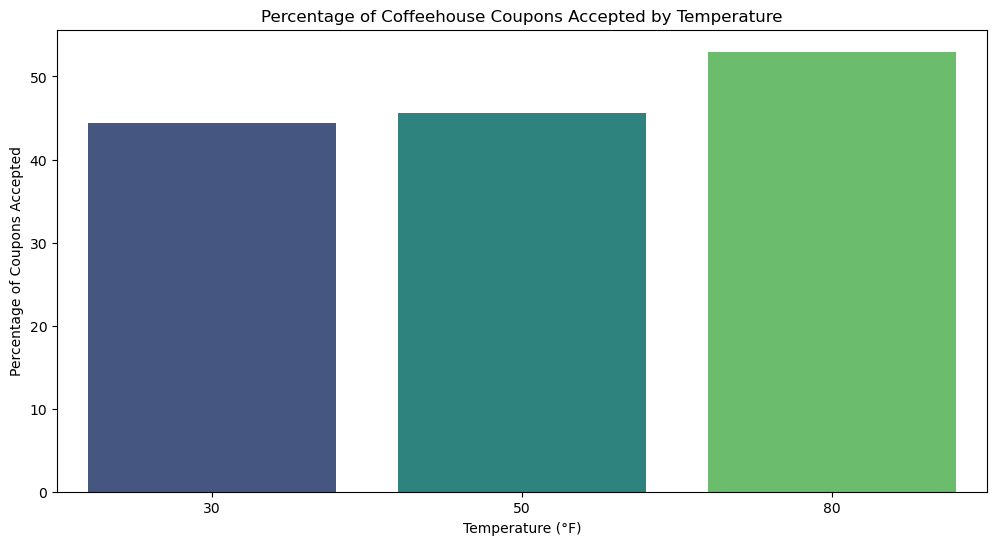

In [26]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=temperature_order, y=percentage_accepted_coffeehouse_by_temperature.values, palette="viridis", order=temperature_order)
plt.xlabel('Temperature (°F)')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Temperature')
plt.xticks(ticks=range(len(temperature_order)), labels=temperature_order_labels)

# Save the plot as an image file
plt.savefig('images/06-percentage-of-coffeehouse-coupons-accepted-by-temperature.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Traveling In 80F Weather and Those Traveling in 30F or 50F Weather

In [27]:
# Group and compute the number of accepted Coffeehouse coupons by those traveling in 80F weather
accepted_coffeehouse_hot = accepted_coffeehouse_by_temperature.loc[80] # Group and compute the number of accepted Coffeehouse coupons by those traveling in 80F weather
total_coffeehouse_hot = total_coffeehouse_by_temperature.loc[80] # Group and compute the total number of Coffeehouse coupons by those traveling in 80F weather
percentage_accepted_coffeehouse_hot = (accepted_coffeehouse_hot / total_coffeehouse_hot) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those traveling in 80F weather

# Group and compute the number of accepted Coffeehouse coupons by those traveling in 30F or 50F weather
accepted_coffeehouse_cold = accepted_coffeehouse_by_temperature.loc[[30, 55]].sum() # Group and compute the number of accepted Coffeehouse coupons by those traveling in 30F or 50F weather
total_coffeehouse_cold = total_coffeehouse_by_temperature.loc[[30, 55]].sum() # Group and compute the total number of Coffeehouse coupons by those traveling in 30F or 50F weather
percentage_accepted_coffeehouse_cold = (accepted_coffeehouse_cold / total_coffeehouse_cold) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those traveling in 30F or 50F weather

print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling in Hot Weather: {accepted_coffeehouse_hot}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling in Hot Weather: {total_coffeehouse_hot}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Hot Weather: {percentage_accepted_coffeehouse_hot:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling in Cold Weather: {accepted_coffeehouse_cold}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling in Cold Weather: {total_coffeehouse_cold}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Cold Weather: {percentage_accepted_coffeehouse_cold:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who are Traveling in Hot Weather: 1272
Total Coffeehouse Coupons for Those Who are Traveling in Hot Weather: 2401
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Hot Weather: 52.98%

Total Coffeehouse Coupons Accepted by Those Who are Traveling in Cold Weather: 723
Total Coffeehouse Coupons for Those Who are Traveling in Cold Weather: 1595
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling in Cold Weather: 45.33%


### Compare Percentages of Coffeehouse Coupons Accepted by Time

In [28]:
# Group and compute the number of accepted Coffeehouse coupons by time
accepted_coffeehouse_by_time = coffeehouse_df.groupby('time')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by time
total_coffeehouse_by_time = coffeehouse_df.groupby('time')['Y'].count() # Group and compute the total number of Coffeehouse coupons by time
percentage_accepted_coffeehouse_by_time = (accepted_coffeehouse_by_time / total_coffeehouse_by_time) * 100 # Calculate the percentage of accepted Coffeehouse coupons by time

# Predefined custom order and labels for time for better presentation in table and bar plot
time_order = ['7AM', '10AM', '2PM', '6PM', '10PM']
time_order_labels = ['7AM', '10AM', '2PM', '6PM', '10PM']
# Reorder the series based on the custom order
accepted_coffeehouse_by_time = accepted_coffeehouse_by_time.reindex(time_order)
total_coffeehouse_by_time = total_coffeehouse_by_time.reindex(time_order)
percentage_accepted_coffeehouse_by_time = percentage_accepted_coffeehouse_by_time.reindex(time_order)

# Predefined format for printing results in a table-like manner
coffeehouse_time_data_table_format = "{:<4} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Time")
print("")
print(coffeehouse_time_data_table_format.format("Time", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 60)

# Print the values for each destination based on the custom order and format
for i, time in enumerate(time_order):
    print(coffeehouse_time_data_table_format.format(
        time_order_labels[i],
        accepted_coffeehouse_by_time[time],
        total_coffeehouse_by_time[time],
        round(percentage_accepted_coffeehouse_by_time[time], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Time

Time | Total Accepted | Total Coupons | Percentage Accepted 
------------------------------------------------------------
7AM  | 407            | 913           | 44.58               
10AM | 576            | 899           | 64.07               
2PM  | 435            | 794           | 54.79               
6PM  | 451            | 1093          | 41.26               
10PM | 126            | 297           | 42.42               


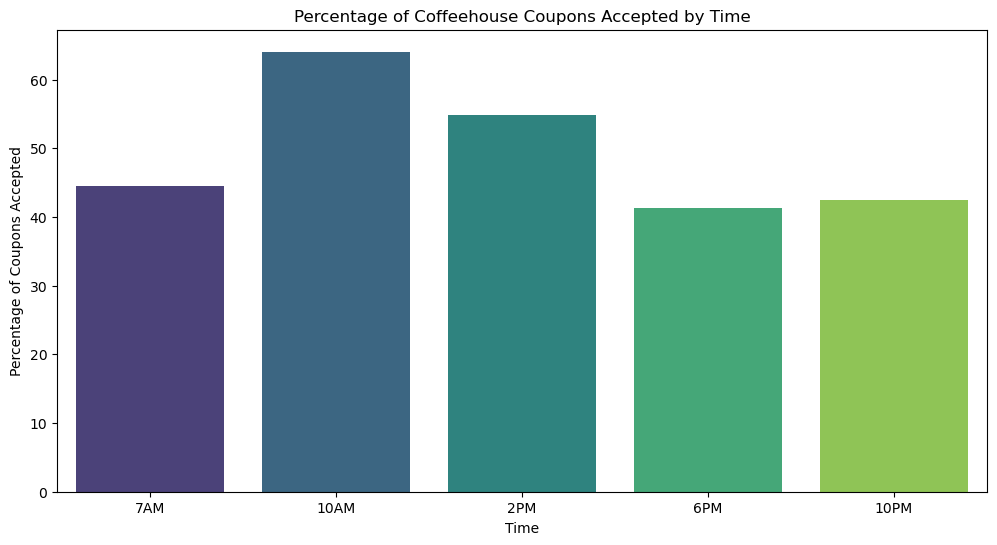

In [29]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=time_order, y=percentage_accepted_coffeehouse_by_time.values, palette="viridis", order=time_order)
plt.xlabel('Time')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Time')
plt.xticks(ticks=range(len(time_order)), labels=time_order_labels)

# Save the plot as an image file
plt.savefig('images/07-percentage-of-coffeehouse-coupons-accepted-by-time.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Traveling at 10AM and Those Traveling at Other Times

In [30]:
# Group and compute the number of accepted Coffeehouse coupons by those traveling at 10AM
accepted_coffeehouse_10am = accepted_coffeehouse_by_time.loc['10AM'] # Group and compute the number of accepted Coffeehouse coupons by those traveling at 10AM
total_coffeehouse_10am = total_coffeehouse_by_time.loc['10AM'] # Group and compute the total number of Coffeehouse coupons by those traveling at 10AM
percentage_accepted_coffeehouse_10am = (accepted_coffeehouse_10am / total_coffeehouse_10am) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those traveling at 10AM

# Group and compute the number of accepted Coffeehouse coupons by those traveling at other times
accepted_coffeehouse_other_times = accepted_coffeehouse_by_time.loc[['7AM', '2PM', '6PM', '10PM']].sum() # Group and compute the number of accepted Coffeehouse coupons by those traveling at other times
total_coffeehouse_other_times = total_coffeehouse_by_time.loc[['7AM', '2PM', '6PM', '10PM']].sum() # Group and compute the total number of Coffeehouse coupons by those traveling at other times
percentage_accepted_coffeehouse_other_times = (accepted_coffeehouse_other_times / total_coffeehouse_other_times) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those traveling at other times

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling at 10AM: {accepted_coffeehouse_10am}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling at 10AM: {total_coffeehouse_10am}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling at 10AM: {percentage_accepted_coffeehouse_10am:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who are Traveling at Other Times: {accepted_coffeehouse_other_times}")
print(f"Total Coffeehouse Coupons for Those Who are Traveling at Other Times: {total_coffeehouse_other_times}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling at Other Times: {percentage_accepted_coffeehouse_other_times:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who are Traveling at 10AM: 576
Total Coffeehouse Coupons for Those Who are Traveling at 10AM: 899
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling at 10AM: 64.07%

Total Coffeehouse Coupons Accepted by Those Who are Traveling at Other Times: 1419
Total Coffeehouse Coupons for Those Who are Traveling at Other Times: 3097
Percentage of Coffeehouse Coupons Accepted by Those Who are Traveling at Other Times: 45.82%


### Compare Percentages of Coffeehouse Coupons Accepted by Gender

In [31]:
# Group and compute the number of accepted Coffeehouse coupons by gender
accepted_coffeehouse_by_gender = coffeehouse_df.groupby('gender')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by gender
total_coffeehouse_by_gender = coffeehouse_df.groupby('gender')['Y'].count() # Group and compute the total number of Coffeehouse coupons by gender
percentage_accepted_coffeehouse_by_gender = (accepted_coffeehouse_by_gender / total_coffeehouse_by_gender) * 100 # Calculate the percentage of accepted Coffeehouse coupons by gender

# Predefined custom order and labels for gender for better presentation in table and bar plot
gender_order = ['Female', 'Male']
gender_order_labels = ['Female', 'Male']
# Reorder the series based on the custom order
accepted_coffeehouse_by_gender = accepted_coffeehouse_by_gender.reindex(gender_order)
total_coffeehouse_by_gender = total_coffeehouse_by_gender.reindex(gender_order)
percentage_accepted_coffeehouse_by_gender = percentage_accepted_coffeehouse_by_gender.reindex(gender_order)

# Predefined format for printing results in a table-like manner
coffeehouse_gender_data_table_format = "{:<6} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Gender")
print("")
print(coffeehouse_gender_data_table_format.format("Gender", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 62)

# Print the values for each destination based on the custom order and format
for i, gender in enumerate(gender_order):
    print(coffeehouse_gender_data_table_format.format(
        gender_order_labels[i],
        accepted_coffeehouse_by_gender[gender],
        total_coffeehouse_by_gender[gender],
        round(percentage_accepted_coffeehouse_by_gender[gender], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Gender

Gender | Total Accepted | Total Coupons | Percentage Accepted 
--------------------------------------------------------------
Female | 1010           | 2051          | 49.24               
Male   | 985            | 1945          | 50.64               


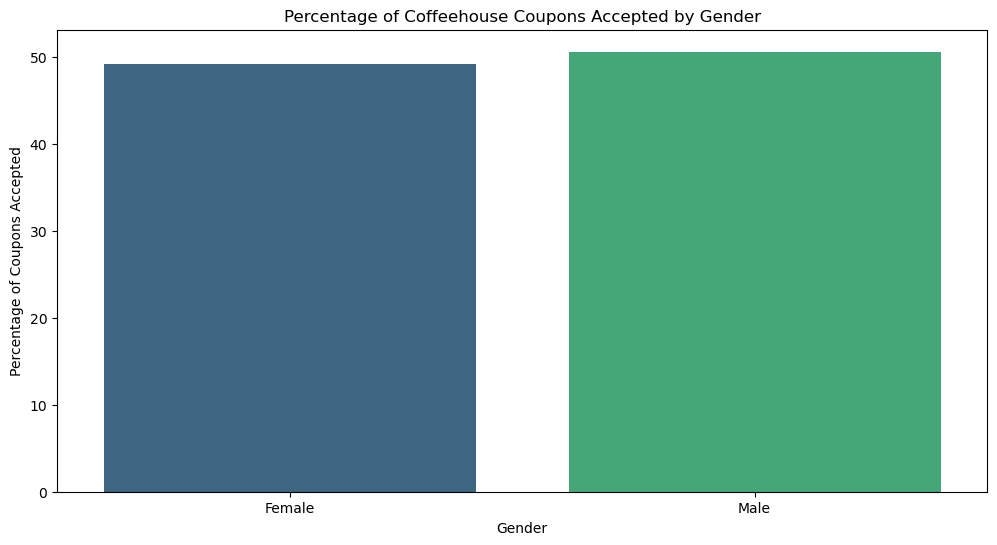

In [32]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=gender_order, y=percentage_accepted_coffeehouse_by_gender.values, palette="viridis", order=gender_order)
plt.xlabel('Gender')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Gender')
plt.xticks(ticks=range(len(gender_order)), labels=gender_order_labels)

# Save the plot as an image file
plt.savefig('images/08-percentage-of-coffeehouse-coupons-accepted-by-gender.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

### Compare Percentages of Coffeehouse Coupons Accepted by Age

In [33]:
# Group and compute the number of accepted Coffeehouse coupons by age
accepted_coffeehouse_by_age = coffeehouse_df.groupby('age')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by age
total_coffeehouse_by_age = coffeehouse_df.groupby('age')['Y'].count() # Group and compute the total number of Coffeehouse coupons by age
percentage_accepted_coffeehouse_by_age = (accepted_coffeehouse_by_age / total_coffeehouse_by_age) * 100 # Calculate the percentage of accepted Coffeehouse coupons by age

# Predefined custom order and labels for age for better presentation in table and bar plot
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']
age_order_labels = ['<21', '21', '26', '31', '36', '41', '46', '50+']

# Reorder the series based on the custom order
accepted_coffeehouse_by_age = accepted_coffeehouse_by_age.reindex(age_order)
total_coffeehouse_by_age = total_coffeehouse_by_age.reindex(age_order)
percentage_accepted_coffeehouse_by_age = percentage_accepted_coffeehouse_by_age.reindex(age_order)

# Predefined format for printing results in a table-like manner
coffeehouse_age_data_table_format = "{:<3} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Age")
print("")
print(coffeehouse_age_data_table_format.format("Age", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 59)

# Print the values for each destination based on the custom order and format
for i, age in enumerate(age_order):
    print(coffeehouse_age_data_table_format.format(
        age_order_labels[i],
        accepted_coffeehouse_by_age[age],
        total_coffeehouse_by_age[age],
        round(percentage_accepted_coffeehouse_by_age[age], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Age

Age | Total Accepted | Total Coupons | Percentage Accepted 
-----------------------------------------------------------
<21 | 108            | 155           | 69.68               
21  | 463            | 883           | 52.43               
26  | 434            | 843           | 51.48               
31  | 297            | 623           | 47.67               
36  | 188            | 402           | 46.77               
41  | 163            | 325           | 50.15               
46  | 113            | 220           | 51.36               
50+ | 229            | 545           | 42.02               


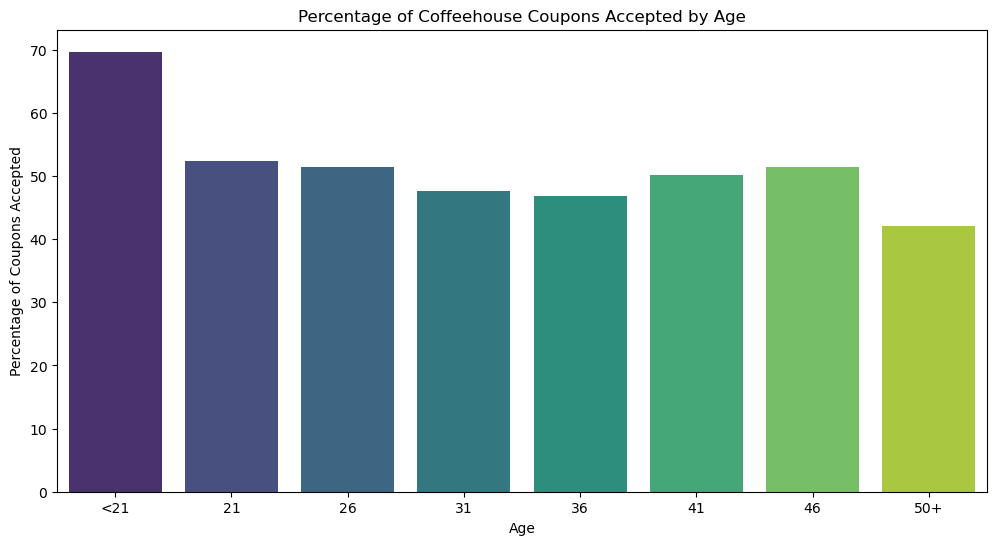

In [34]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=age_order, y=percentage_accepted_coffeehouse_by_age.values, palette="viridis", order=age_order)
plt.xlabel('Age')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Age')
plt.xticks(ticks=range(len(age_order)), labels=age_order_labels)

# Save the plot as an image file
plt.savefig('images/09-percentage-of-coffeehouse-coupons-accepted-by-age.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those <21 Years Old and Those >=21 Years Old

In [35]:
# Group and compute the number of accepted Coffeehouse coupons by those <21 years old
accepted_coffeehouse_below21 = accepted_coffeehouse_by_age.loc['below21'] # Group and compute the number of accepted Coffeehouse coupons by those <21 years old
total_coffeehouse_below21 = total_coffeehouse_by_age.loc['below21'] # Group and compute the total number of Coffeehouse coupons by those <21 years old
percentage_accepted_coffeehouse_below21 = (accepted_coffeehouse_below21 / total_coffeehouse_below21) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those <21 years old

# Group and compute the number of accepted Coffeehouse coupons by those >=21 years old
accepted_coffeehouse_above21 = accepted_coffeehouse_by_age.loc['21':].sum() # Group and compute the number of accepted Coffeehouse coupons by those >=21 years old
total_coffeehouse_above21 = total_coffeehouse_by_age.loc['21':].sum() # Group and compute the total number of Coffeehouse coupons by those >=21 years old
percentage_accepted_coffeehouse_above21 = (accepted_coffeehouse_above21 / total_coffeehouse_above21) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those >=21 years old

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Under 21 Years Old: {accepted_coffeehouse_below21}")
print(f"Total Coffeehouse Coupons for Those Under 21 Years Old: {total_coffeehouse_below21}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Under 21 Years Old: {percentage_accepted_coffeehouse_below21:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those >=21 Years Old: {accepted_coffeehouse_above21}")
print(f"Total Coffeehouse Coupons for Those >=21 Years Old: {total_coffeehouse_above21}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those >=21 Years Old: {percentage_accepted_coffeehouse_above21:.2f}%")

Total Coffeehouse Coupons Accepted by Those Under 21 Years Old: 108
Total Coffeehouse Coupons for Those Under 21 Years Old: 155
Percentage of Coffeehouse Coupons Accepted by Those Under 21 Years Old: 69.68%

Total Coffeehouse Coupons Accepted by Those >=21 Years Old: 1887
Total Coffeehouse Coupons for Those >=21 Years Old: 3841
Percentage of Coffeehouse Coupons Accepted by Those >=21 Years Old: 49.13%


### Compare Percentages of Coffeehouse Coupons Accepted by Marital Status

In [36]:
# Group and compute the number of accepted Coffeehouse coupons by marital status
accepted_coffeehouse_by_marital_status = coffeehouse_df.groupby('maritalStatus')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by marital status
total_coffeehouse_by_marital_status = coffeehouse_df.groupby('maritalStatus')['Y'].count() # Group and compute the total number of Coffeehouse coupons by marital status
percentage_accepted_coffeehouse_by_marital_status = (accepted_coffeehouse_by_marital_status / total_coffeehouse_by_marital_status) * 100 # Calculate the percentage of accepted Coffeehouse coupons by marital status

# Predefined custom order and labels for marital status for better presentation in table and bar plot
marital_status_order = ['Divorced', 'Married partner', 'Single', 'Unmarried partner', 'Widowed']
marital_status_order_labels = ['Divorced', 'Married', 'Single', 'Unmarried', 'Widowed']
# Reorder the series based on the custom order
accepted_coffeehouse_by_marital_status = accepted_coffeehouse_by_marital_status.reindex(marital_status_order)
total_coffeehouse_by_marital_status = total_coffeehouse_by_marital_status.reindex(marital_status_order)
percentage_accepted_coffeehouse_by_marital_status = percentage_accepted_coffeehouse_by_marital_status.reindex(marital_status_order)

# Predefined format for printing results in a table-like manner
coffeehouse_marital_status_data_table_format = "{:<14} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Marital Status")
print("")
print(coffeehouse_marital_status_data_table_format.format("Marital Status", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 70)

# Print the values for each destination based on the custom order and format
for i, marital_status in enumerate(marital_status_order):
    print(coffeehouse_marital_status_data_table_format.format(
        marital_status_order_labels[i],
        accepted_coffeehouse_by_marital_status[marital_status],
        total_coffeehouse_by_marital_status[marital_status],
        round(percentage_accepted_coffeehouse_by_marital_status[marital_status], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Marital Status

Marital Status | Total Accepted | Total Coupons | Percentage Accepted 
----------------------------------------------------------------------
Divorced       | 79             | 151           | 52.32               
Married        | 760            | 1541          | 49.32               
Single         | 800            | 1550          | 51.61               
Unmarried      | 343            | 717           | 47.84               
Widowed        | 13             | 37            | 35.14               


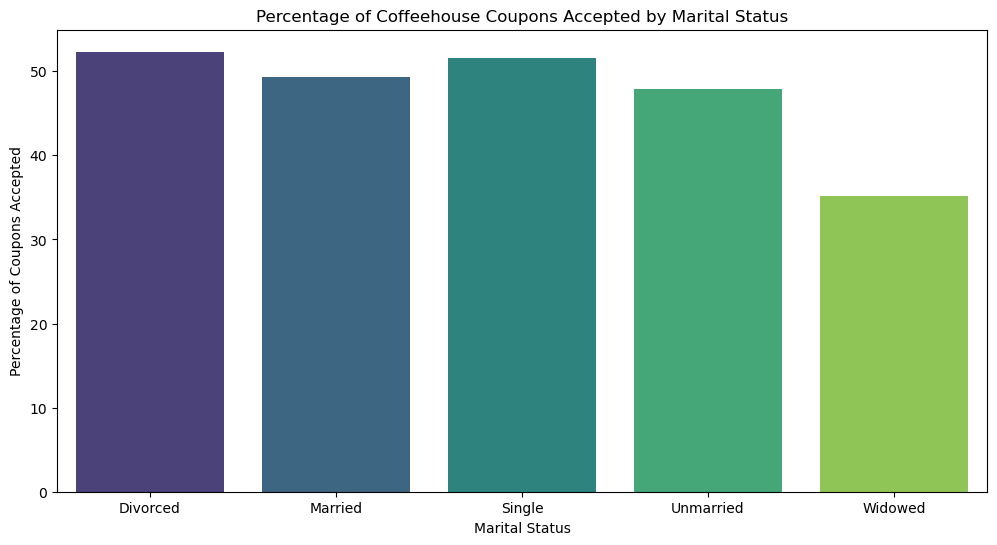

In [37]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=marital_status_order, y=percentage_accepted_coffeehouse_by_marital_status.values, palette="viridis", order=marital_status_order)
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Marital Status')
plt.xticks(ticks=range(len(marital_status_order)), labels=marital_status_order_labels)

# Save the plot as an image file
plt.savefig('images/10-percentage-of-coffeehouse-coupons-accepted-by-marital-status.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Who Are Not Widowed and Those Who Are Widowed

In [38]:
# Group and compute the number of accepted Coffeehouse coupons by those who are not widowed
accepted_coffeehouse_not_widowed = accepted_coffeehouse_by_marital_status.loc[['Divorced', 'Married partner', 'Single', 'Unmarried partner']].sum() # Group and compute the number of accepted Coffeehouse coupons by those who are not widowed
total_coffeehouse_not_widowed = total_coffeehouse_by_marital_status.loc[['Divorced', 'Married partner', 'Single', 'Unmarried partner']].sum() # Group and compute the total number of Coffeehouse coupons by those who are not widowed
percentage_accepted_coffeehouse_not_widowed = (accepted_coffeehouse_not_widowed / total_coffeehouse_not_widowed) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those who are not widowed

# Group and compute the number of accepted Coffeehouse coupons by those who are widowed
accepted_coffeehouse_widowed = accepted_coffeehouse_by_marital_status.loc['Widowed'] # Group and compute the number of accepted Coffeehouse coupons by those who are widowed
total_coffeehouse_widowed = total_coffeehouse_by_marital_status.loc['Widowed'] # Group and compute the total number of Coffeehouse coupons by those who are widowed
percentage_accepted_coffeehouse_widowed = (accepted_coffeehouse_widowed / total_coffeehouse_widowed) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those who are widowed

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who are Not Widowed: {accepted_coffeehouse_not_widowed}")
print(f"Total Coffeehouse Coupons for Those Who are Not Widowed: {total_coffeehouse_not_widowed}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Not Widowed: {percentage_accepted_coffeehouse_not_widowed:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who are Widowed: {accepted_coffeehouse_widowed}")
print(f"Total Coffeehouse Coupons for Those Who are Widowed: {total_coffeehouse_widowed}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who are Widowed: {percentage_accepted_coffeehouse_widowed:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who are Not Widowed: 1982
Total Coffeehouse Coupons for Those Who are Not Widowed: 3959
Percentage of Coffeehouse Coupons Accepted by Those Who are Not Widowed: 50.06%

Total Coffeehouse Coupons Accepted by Those Who are Widowed: 13
Total Coffeehouse Coupons for Those Who are Widowed: 37
Percentage of Coffeehouse Coupons Accepted by Those Who are Widowed: 35.14%


### Compare Percentages of Coffeehouse Coupons Accepted by Education

In [39]:
# Group and compute the number of accepted Coffeehouse coupons by education
accepted_coffeehouse_by_education = coffeehouse_df.groupby('education')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by education
total_coffeehouse_by_education = coffeehouse_df.groupby('education')['Y'].count() # Group and compute the total number of Coffeehouse coupons by education
percentage_accepted_coffeehouse_by_education = (accepted_coffeehouse_by_education / total_coffeehouse_by_education) * 100 # Calculate the percentage of accepted Coffeehouse coupons by education

# Predefined custom order and labels for education for better presentation in table and bar plot
education_order = ['Some High School', 'High School Graduate', 'Some college - no degree', 'Associates degree', 'Bachelors degree', 'Graduate degree (Masters or Doctorate)']
education_order_labels = ['Some High School', 'High School Graduate', 'Some College (No Degree)', 'Associate\'s Degree', 'Bachelor\'s Degree', 'Graduate Degree']

# Reorder the series based on the custom order
accepted_coffeehouse_by_education = accepted_coffeehouse_by_education.reindex(education_order)
total_coffeehouse_by_education = total_coffeehouse_by_education.reindex(education_order)
percentage_accepted_coffeehouse_by_education = percentage_accepted_coffeehouse_by_education.reindex(education_order)

# Predefined format for printing results in a table-like manner
coffeehouse_education_data_table_format = "{:<24} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Education")
print("")
print(coffeehouse_education_data_table_format.format("Education", "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 80)

# Print the values for each destination based on the custom order and format
for i, education in enumerate(education_order):
    print(coffeehouse_education_data_table_format.format(
        education_order_labels[i],
        accepted_coffeehouse_by_education[education],
        total_coffeehouse_by_education[education],
        round(percentage_accepted_coffeehouse_by_education[education], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Education

Education                | Total Accepted | Total Coupons | Percentage Accepted 
--------------------------------------------------------------------------------
Some High School         | 17             | 28            | 60.71               
High School Graduate     | 151            | 279           | 54.12               
Some College (No Degree) | 707            | 1371          | 51.57               
Associate's Degree       | 181            | 350           | 51.71               
Bachelor's Degree        | 634            | 1370          | 46.28               
Graduate Degree          | 305            | 598           | 51.0                


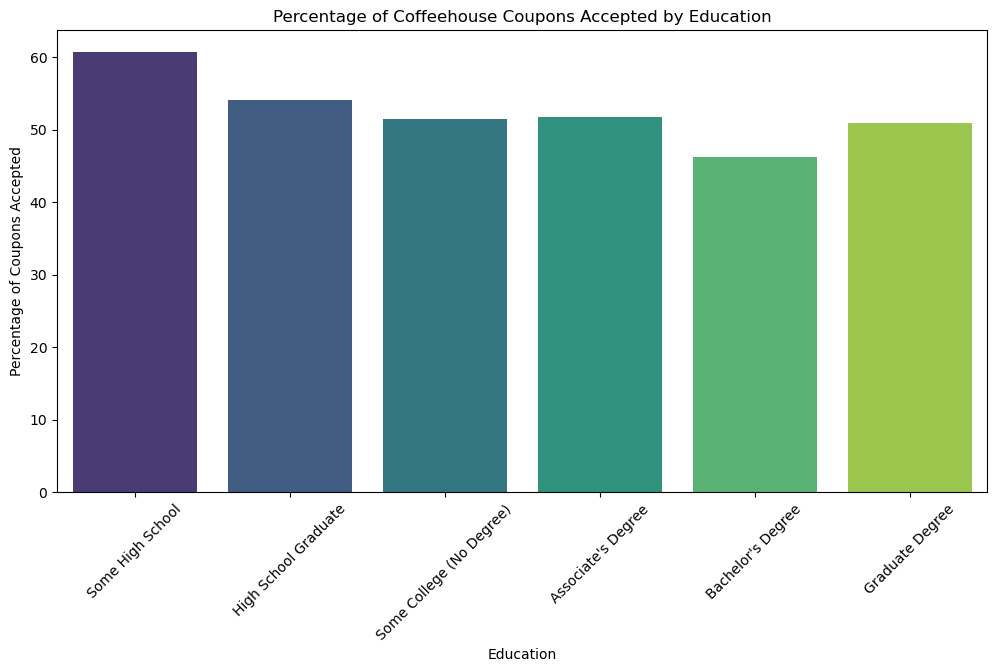

In [40]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=education_order, y=percentage_accepted_coffeehouse_by_education.values, palette="viridis", order=education_order)
plt.xlabel('Education')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Education')
plt.xticks(ticks=range(len(education_order)), labels=education_order_labels, rotation=45)

# Save the plot as an image file
plt.savefig('images/11-percentage-of-coffeehouse-coupons-accepted-by-education.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

### Compare Percentages of Coffeehouse Coupons Accepted by Frequency of Coffeehouse Visits per Month

In [41]:
# Group and compute the number of accepted Coffeehouse coupons by frequency of coffeehouse visits per month
accepted_coffeehouse_by_frequency = coffeehouse_df.groupby('CoffeeHouse')['Y'].sum() # Group and compute the number of accepted Coffeehouse coupons by frequency of coffeehouse visits per month
total_coffeehouse_by_frequency = coffeehouse_df.groupby('CoffeeHouse')['Y'].count() # Group and compute the total number of Coffeehouse coupons by frequency of coffeehouse visits per month
percentage_accepted_coffeehouse_by_frequency = (accepted_coffeehouse_by_frequency / total_coffeehouse_by_frequency) * 100 # Calculate the percentage of accepted Coffeehouse coupons by frequency of coffeehouse visits per month

# Predefined custom order and labels for coffeehouse visits per month for better presentation in table and bar plot
frequency_order = ['never', 'less1', '1~3', '4~8', 'gt8']
frequency_order_labels = ['Never', '<1', '1-3', '4-8', '>8']

# Reorder the series based on the custom order
accepted_coffeehouse_by_frequency = accepted_coffeehouse_by_frequency.reindex(frequency_order)
total_coffeehouse_by_frequency = total_coffeehouse_by_frequency.reindex(frequency_order)
percentage_accepted_coffeehouse_by_frequency = percentage_accepted_coffeehouse_by_frequency.reindex(frequency_order)

# Predefined format for printing results in a table-like manner
coffeehouse_frequency_data_table_format = "{:<9} | {:<14} | {:<13} | {:<20}"

# Print table headers
print("Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Frequency of Coffeehouse Visits")
print("")
print(coffeehouse_frequency_data_table_format.format('Frequency', "Total Accepted", "Total Coupons", "Percentage Accepted"))
print("-" * 65)

# Print the values for each destination based on the custom order and format
for freq in frequency_order:
    print(coffeehouse_frequency_data_table_format.format(
        freq,
        accepted_coffeehouse_by_frequency[freq],
        total_coffeehouse_by_frequency[freq],
        round(percentage_accepted_coffeehouse_by_frequency[freq], 2)
    ))

Total Accepted, Total Coupons, and Percentage of Coffeehouse Coupons Accepted by Frequency of Coffeehouse Visits

Frequency | Total Accepted | Total Coupons | Percentage Accepted 
-----------------------------------------------------------------
never     | 175            | 927           | 18.88               
less1     | 551            | 1147          | 48.04               
1~3       | 675            | 1042          | 64.78               
4~8       | 369            | 538           | 68.59               
gt8       | 225            | 342           | 65.79               


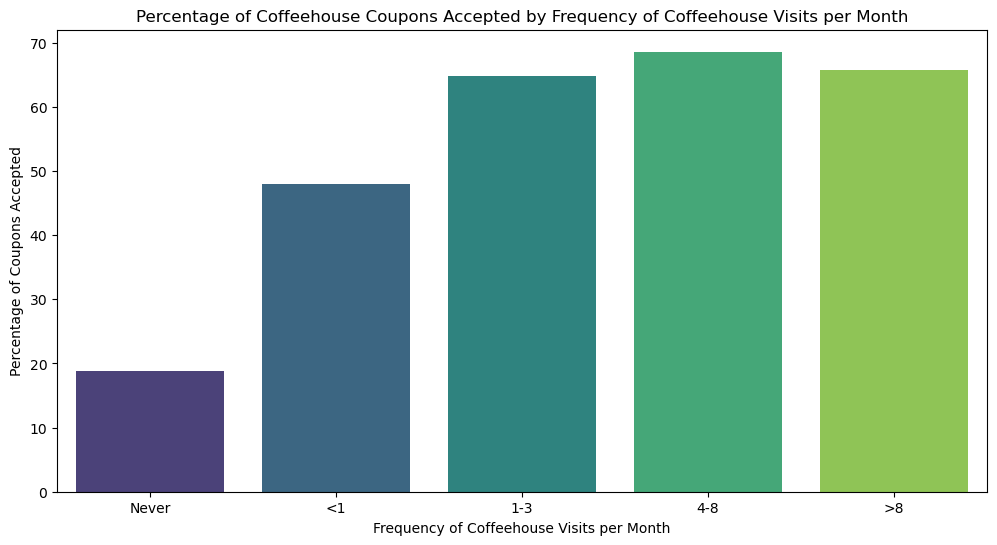

In [42]:
# Plot the results using seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=frequency_order, y=percentage_accepted_coffeehouse_by_frequency.values, palette="viridis", order=frequency_order)
plt.xlabel('Frequency of Coffeehouse Visits per Month')
plt.ylabel('Percentage of Coupons Accepted')
plt.title('Percentage of Coffeehouse Coupons Accepted by Frequency of Coffeehouse Visits per Month')
plt.xticks(ticks=range(len(frequency_order)), labels=frequency_order_labels)

# Save the plot as an image file
plt.savefig('images/12-percentage-of-coffeehouse-coupons-accepted-by-frequency-of-coffeehouse-visits-per-month.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Who Go to Coffeehouses <1 Time per Month and Those Who Go to Coffeehouses >=1 Time per Month

In [43]:
# Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses <1 time per month
accepted_coffeehouse_less_than_1 = accepted_coffeehouse_by_frequency.loc['less1'] # Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses <1 time per month
total_coffeehouse_less_than_1 = total_coffeehouse_by_frequency.loc['less1'] # Group and compute the total number of Coffeehouse coupons by those who go to coffeehouses <1 time per month
percentage_accepted_coffeehouse_less_than_1 = (accepted_coffeehouse_less_than_1 / total_coffeehouse_less_than_1) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those who go to coffeehouses <1 time per month

# Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month
accepted_coffeehouse_greater_than_1 = accepted_coffeehouse_by_frequency.loc['1~3':].sum() # Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month
total_coffeehouse_greater_than_1 = total_coffeehouse_by_frequency.loc['1~3':].sum() # Group and compute the total number of Coffeehouse coupons by those who go to coffeehouses >=1 time per month
percentage_accepted_coffeehouse_greater_than_1 = (accepted_coffeehouse_greater_than_1 / total_coffeehouse_greater_than_1) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse <1x per Month: {accepted_coffeehouse_less_than_1}")
print(f"Total Coffeehouse Coupons for Those Who Go to the Coffeehouse <1x per Month: {total_coffeehouse_less_than_1}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse <1x per Month: {percentage_accepted_coffeehouse_less_than_1:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month: {accepted_coffeehouse_greater_than_1}")
print(f"Total Coffeehouse Coupons for Those Who Go to the Coffeehouse >=1x per Month: {total_coffeehouse_greater_than_1}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month: {percentage_accepted_coffeehouse_greater_than_1:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse <1x per Month: 551
Total Coffeehouse Coupons for Those Who Go to the Coffeehouse <1x per Month: 1147
Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse <1x per Month: 48.04%

Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month: 1269
Total Coffeehouse Coupons for Those Who Go to the Coffeehouse >=1x per Month: 1922
Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month: 66.02%


### Compare Acceptance Rates for Coffeehouse Coupons by Age and Frequency of Visiting Coffeehouses

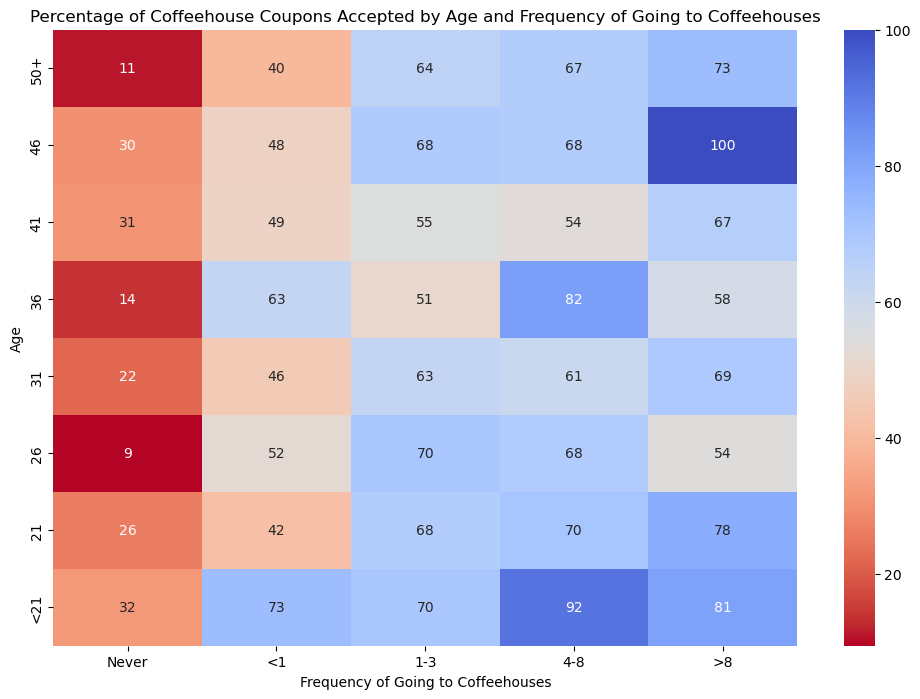

In [44]:
# Predefined custom order and labels for age for better presentation in heatmap
age_order_reversed = ['50plus', '46', '41', '36', '31', '26', '21', 'below21']
age_order_reversed_labels = ['50+', '46', '41', '36', '31', '26', '21', '<21']

# Create a pivot table that aggregates the mean acceptance of coupons by age and coffeehouse visit frequency
pivot_table = coffeehouse_df.pivot_table(values='Y', index='age', columns='CoffeeHouse', aggfunc=[np.mean], fill_value=0)

# Drop the top level of multi-index column names (since we're interested only in 'CoffeeHouse' values)
pivot_table.columns = pivot_table.columns.droplevel(0)

# Reorder the rows and columns according to predefined order
pivot_table = pivot_table.loc[age_order_reversed, frequency_order]

# Convert proportions to percentages for better readability
pivot_table *= 100

# Helper function to format numbers in the heatmap
def fmt(x):
    return '{:.0f}'.format(x)

# Plot the results using seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='coolwarm_r', cbar=True, xticklabels=frequency_order_labels, yticklabels=age_order_reversed_labels)
plt.title('Percentage of Coffeehouse Coupons Accepted by Age and Frequency of Going to Coffeehouses')
plt.xlabel('Frequency of Going to Coffeehouses')
plt.ylabel('Age')

# Save the plot as an image file
plt.savefig('images/13-percentage-of-coffeehouse-coupons-accepted-by-age-and-frequency-of-going-to-coffeehouses.png', bbox_inches='tight', dpi=300)

# Display the plot
plt.show()

#### Compare Percentages of Coffeehouse Coupons Accepted by Those Who Go to Coffeehouses >=1 Time per Month and Are <=21 Years Old and All Others

In [45]:
# Group 1 Coffeehouse: Those who go to the coffeehouse >=1x per month and are <=21 years old
# Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month and are <=21 years old
group_1_coffeehouse = coffeehouse_df[(coffeehouse_df['CoffeeHouse'].isin(['1~3', '4~8', 'gt8'])) & (coffeehouse_df['age'].isin(['below21', '21']))]
accepted_group_1_coffeehouse = len(group_1_coffeehouse[group_1_coffeehouse['Y'] == 1]) # Group and compute the number of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month and are <=21 years old
total_group_1_coffeehouse = len(group_1_coffeehouse) # Group and compute the total number of Coffeehouse coupons by those who go to coffeehouses >=1 time per month and are <=21 years old
percentage_accepted_group_1_coffeehouse = (accepted_group_1_coffeehouse / total_group_1_coffeehouse if total_group_1_coffeehouse > 0 else 0) * 100 # Calculate the percentage of accepted Coffeehouse coupons by those who go to coffeehouses >=1 time per month and are <=21 years old

# Group 2 Coffeehouse: All others
# Group and compute the number of accepted Coffeehouse coupons by all others
group_2_coffeehouse = coffeehouse_df[~coffeehouse_df.index.isin(group_1_coffeehouse.index)]
accepted_group_2_coffeehouse = len(group_2_coffeehouse[group_2_coffeehouse['Y'] == 1]) # Group and compute the number of accepted Coffeehouse coupons by all others
total_group_2_coffeehouse = len(group_2_coffeehouse) # Group and compute the total number of Coffeehouse coupons by all others
percentage_accepted_group_2_coffeehouse = (accepted_group_2_coffeehouse / total_group_2_coffeehouse if total_group_2_coffeehouse > 0 else 0) * 100 # Calculate the percentage of accepted Coffeehouse coupons by all others

# Print results
print(f"Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: {accepted_group_1_coffeehouse}")
print(f"Total Coffeehouse Coupons for Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: {total_group_1_coffeehouse}")
print(f"Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: {percentage_accepted_group_1_coffeehouse:.2f}%")
print("")
print(f"Total Coffeehouse Coupons Accepted by All Others: {accepted_group_2_coffeehouse}")
print(f"Total Coffeehouse Coupons for All Others: {total_group_2_coffeehouse}")
print(f"Percentage of Coffeehouse Coupons Accepted by All Others {percentage_accepted_group_2_coffeehouse:.2f}%")

Total Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: 402
Total Coffeehouse Coupons for Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: 564
Percentage of Coffeehouse Coupons Accepted by Those Who Go to the Coffeehouse >=1x per Month and are <=21 Years Old: 71.28%

Total Coffeehouse Coupons Accepted by All Others: 1593
Total Coffeehouse Coupons for All Others: 3432
Percentage of Coffeehouse Coupons Accepted by All Others 46.42%
